In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Table of Contents
+ Placeholder
+ Placeholder
+ Placeholder
+ Placeholder
+ Placeholder

In [2]:
# Coin flip simulation
# source: https://www.reddit.com/r/learnpython/comments/71qrzv/simulating_probability_with_nprandomrandom/dncpukj/?st=j8020wir&sh=f0adc5c7

n_experiments = 10000
count = sum(np.random.choice([True, False]) for _ in range(n_experiments))

print count/float(n_experiments)

0.5033


---
### Swarmplot with Seaborn

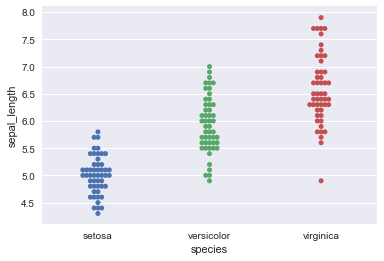

In [10]:
iris = sns.load_dataset('iris')

sns.swarmplot(x='species', y='sepal_length', data=iris)

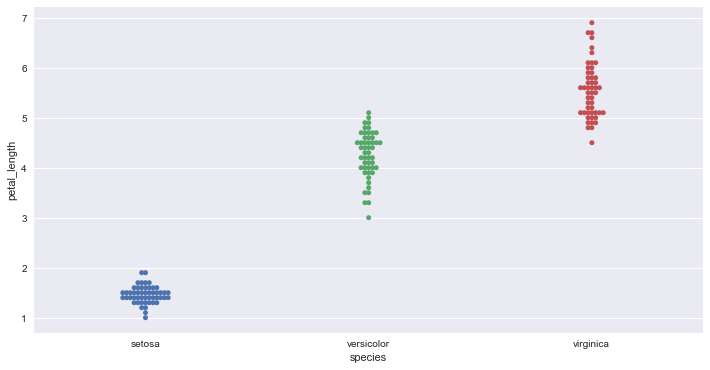

In [13]:
# Change Figsize 
# (lots more options here: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
fig, ax = plt.subplots(figsize=(12,6))

sns.swarmplot(x="species", y="petal_length", data=iris, ax=ax)

plt.show()

---
### How to use *args and **kwargs in Python

Source: https://www.saltycrane.com/blog/2008/01/how-to-use-args-and-kwargs-in-python/

The special syntax, \*args and \*\*kwargs in function definitions is used to pass a variable number of arguments to a function. The single asterisk form (\*args) is used to pass a non-keyworded, variable-length argument list, and the double asterisk form is used to pass a keyworded, variable-length argument list. 

---
### Flexible Arguments: \*args and \*\*kwargs

In [6]:
# *args
# Note that within the function, args is treated as a tuple

def sum_all(*args):
    print type(args)
    
    tot = 0
    for num in args:
        tot += num
        
    return tot

print sum_all(1,3,5,6,3,2)

<type 'tuple'>
20


In [7]:
# kwargs = keyworded arguments. So there's a keyword passed in the function, ilke name='John Connor'.
# The ** turns the keyword and value pairs passed to a dictionary within the function body
# Again, within the function definition, kwargs is a dictionary.

def print_all(**kwargs):
    print type(kwargs)
    
    for k, v in kwargs.items():
        print k, ":", v
        
print_all(name1='John Connor', name2='Sarah Connor')

<type 'dict'>
name2 : Sarah Connor
name1 : John Connor


---
### Lambda Functions

In [8]:
power = lambda x,y: x**y

power(3,2)

9

---
### map, filter, reduce

#### map()

Takes two arguments: map(func, sequence)<br>
applies the function to every item in the sequence.

In [13]:
nums = range(5)

square_all = map(lambda x: x**2, nums)

square_all

[0, 1, 4, 9, 16]

#### filter()
The filter() function filters out items from a list that don't meet certain criteria.

In [24]:
l = range(10)

evens_only = filter(lambda x: x%2==0, l)

evens_only

[0, 2, 4, 6, 8]

#### reduce()
Performs some calculation on a list and returns a single value.<br>
needs to be imported from _functools_.

In [27]:
from functools import reduce

nums = range(10)

tot = reduce(lambda x,y: x+y, nums)

print tot
tot == sum(nums)

45


True

---
### Error Handling

In [36]:
# notice the raise

def expected_value(probability, reward):
    
    # let's check they're both numbers
    
    is_num = lambda x: type(x)==float or type(x)==int

    if not is_num(probability)*is_num(reward):  # hopefully True * True
        raise ValueError('Both arguments need to be numbers')
        
    try:
        return probability*reward
    
    except Exception as e:
        print e
        
expected_value(0.5, 2000)    

1000.0

In [37]:
expected_value(0.5, '2000')

ValueError: Both arguments need to be numbers

---
### Iterators & Iterables
> iterable is an object that can return an iterator, while an iterator is an object that keeps state and produces the next value when you call next() on it. _(DataCamp)_

In [51]:
a = 'hello world!'

it = iter(a)   # iter() docstring: Get an iterator from an object. 

print next(it)
print next(it)
print list(it)

h
e
['l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', '!']


---
### Conditionals in List Comprehension

In [57]:
[x for x in range(15) if x%3==0]

[0, 3, 6, 9, 12]

In [58]:
# with else
print [True if x%3==0 else False for x in range(15)]

[True, False, False, True, False, False, True, False, False, True, False, False, True, False, False]


#### Conditionals in Dicts

In [61]:
from math import sqrt

sqr_root = {x: sqrt(x) for x in range(10)}

sqr_root

{0: 0.0,
 1: 1.0,
 2: 1.4142135623730951,
 3: 1.7320508075688772,
 4: 2.0,
 5: 2.23606797749979,
 6: 2.449489742783178,
 7: 2.6457513110645907,
 8: 2.8284271247461903,
 9: 3.0}

---
### Generators

In [62]:
print 'list comprehension:'

[x**2 for x in range(5)]

list comprehension:


[0, 1, 4, 9, 16]

In [75]:
print 'Generator - () instead of []:'

(x**2 for x in range(5))

Generator - () instead of []:


<generator object <genexpr> at 0x10415d140>

Notice this returns a generator object. <br>
A generator is like a list but it doesn't store the list in memory. We can iterate over it to produce the list as required.

In [64]:
my_generator = (x**2 for x in range(5))

for i in my_generator:
    print i

0
1
4
9
16


In [67]:
my_generator = (x**2 for x in range(5))
list(my_generator)

[0, 1, 4, 9, 16]

**Lazy evaluation** - with next():

In [71]:
my_generator = (x**2 for x in range(5))

next(my_generator)

0

In [72]:
next(my_generator)

1

In [73]:
list(my_generator)

[4, 9, 16]

In [77]:
my_generator = (x**2 for x in range(5))

while True:
    try:
        print next(my_generator)
        
    except:
        break

0
1
4
9
16


#### Generator Functions
Use _yield_ instead of return.

In [84]:
def get_sqr(n):
    x = 0
    while x <= n:
        yield x**2
        x+=1
    
my_gen = get_sqr(10)

my_gen

<generator object get_sqr at 0x10415d500>

In [85]:
while True:
    try:
        print next(my_gen)
        
    except:
        break

0
1
4
9
16
25
36
49
64
81
100


#### Read csv with chunksize - iterator

In [104]:
import pandas as pd

url = 'https://github.com/justmarkham/DAT8/blob/master/data/drinks.csv'

df = pd.read_csv(url, chunksize=100, error_bad_lines=False)

print type(df)
dfs = []
c = 0
while True:
    try:
        print '\rNow appending chunk ', c,
        dfs.append(next(df))
        c+=1
        
    except:
        break
        
print '\n',len(dfs)

full_df = pd.concat(dfs)

print full_df.shape

del dfs, full_df

<class 'pandas.io.parsers.TextFileReader'>
Now appending chunk  22 
22
(2117, 1)


Skipping line 36: expected 1 fields, saw 2
Skipping line 76: expected 1 fields, saw 2
Skipping line 114: expected 1 fields, saw 3
Skipping line 124: expected 1 fields, saw 3
Skipping line 128: expected 1 fields, saw 3
Skipping line 133: expected 1 fields, saw 3
Skipping line 138: expected 1 fields, saw 3
Skipping line 142: expected 1 fields, saw 3
Skipping line 172: expected 1 fields, saw 3
Skipping line 174: expected 1 fields, saw 3

Skipping line 229: expected 1 fields, saw 2

Skipping line 2235: expected 1 fields, saw 2
Skipping line 2236: expected 1 fields, saw 3
Skipping line 2237: expected 1 fields, saw 3
Skipping line 2238: expected 1 fields, saw 3
Skipping line 2239: expected 1 fields, saw 3
Skipping line 2240: expected 1 fields, saw 3
Skipping line 2247: expected 1 fields, saw 3
Skipping line 2248: expected 1 fields, saw 3
Skipping line 2249: expected 1 fields, saw 3
Skipping line 2250: expected 1 fields, saw 3
Skipping line 2251: expected 1 fields, saw 3
Skipping line 2252: e

---
### Read pickled files
File type native to python. Pickled files are serialized, which means the contents were converted to bytestream.

In [ ]:
import pickle

with open('data.pkl', 'rb') as file:
    data = pickle.load(file)

---
### Read HDF5 files
Hierarchical Data Format ver. 5. <br>
Becoming the standard for storing large quantities of numerical data. (gigabytes and terabytes are common, even exabytes are possible.

In [ ]:
import h5py


filename = 'somefile.hdf5'

data = h5py.File(filename, 'r')

print(type(data))

for key in data.keys():
    print(key)

---
### Working with DataBases - SQLAlchemy

In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///db_name.sqlite')

conn = engine.connect() # params as needed

rs = conn.execute('SELECT * FTOM tablename') # rs = results, for the results object returned

# Query result to datafram. tags: sql to df, sql to pandas
df = pd.DataFrame(rs.fetchall())  # instead of fetchall, you can pd.DataFrame(rs.fetchmany(size=10)) to fetch a subseta
df.columns = rs.keys() # <-- !!, otherwise the df won't have proper column names

# Don't forget:
conn.close()

In [ ]:
# Alternatively:

with engine.connect() as conn:
    rs = conn.execute
#    df = ... and so on

Even better:

In [ ]:
engine = create_engine('sqlite:///db_name.sqlite')

df = pd.read_sql_query('SELECT * FTOM tablename', engine)

In [ ]:
# Getting the table names
table_names = engine.table_names()

---
### Reading Files From Folder
Requires:
+ os
+ glob (for the last one)

In [107]:
# gets the first file in the folder
filename = os.listdir(folder_name)[0]

# likewise, but filters out hidden files (they start with '.')
filename = filter(lambda f: not f.startswith('.'), os.listdir(folder_name))[0]

# Gets the most recently created file.
# requires glob (included in python)
filename = max(glob.iglob(dl_path+'*.xls'), key=os.path.getctime)

---
### placeholder

#### Magic command - Explore/dir the current working directory

In [ ]:
! ls